In [172]:
%matplotlib inline
from utils_all import *

from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE, MDS

from sklearn.decomposition import IncrementalPCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Exploratory data analysis: dimensionality reduction

In [2]:
%store -r DATA_NUM_CL_WITH_NAN_TXT_XY

In [3]:
data = DATA_NUM_CL_WITH_NAN_TXT_XY

In [4]:
data.head()

url    meta_name  \
3   http://www.ticketbis.com/ar/entradas-schalke-0...         name   
8   http://www.chicagoparkdistrict.com/parks/Galew...         name   
10  http://www.chicagoparkdistrict.com/parks/Galew...     location   
11  http://www.chicagoparkdistrict.com/parks/Scott...         name   
14  http://www.chicagoparkdistrict.com/parks/Scott...  description   

                                                 text  tag  color_r  color_g  \
3                          FC Ingolstadt - Schalke 04   26     94.0    103.0   
8               Movie Inside the Park at Mayfair Park   26     51.0     51.0   
10  Mayfair Park                         4550 W. S...   22      0.0      0.0   
11        Night Out: Movies in the Parks at Sauganash   26     51.0     51.0   
14  The Land Before TimeFive orphan dinosaurs trav...   26      0.0      0.0   

    color_b  font_size  display  font_weight    ...     height  width  \
3     113.0       11.0        4          400    ...       -1.0   -1.0   
8      51.0       26.0        4          300    ...       -1.0   -1.0   
10      0.0       13.0        3          400    ...      100.0  370.0   
11     51.0       26.0        4          300    ...       -1.0   -1.0   
14      0.0       13.0        4          400    ...       -1.0   -1.0   

    text_len  num_punctuation  num_digits  digits_share  num_upper  \
3       26.0              1.0         2.0      0.076923        4.0   
8       37.0              0.0         0.0      0.000000        5.0   
10       NaN              6.0         NaN      0.126667        7.0   
11      43.0              1.0         0.0      0.000000        5.0   
14       NaN              6.0         6.0      0.023715       13.0   

    num_whitespace  x_center  y_center  
3              4.0     107.5    1252.0  
8              6.0     193.5     230.0  
10             NaN     200.0     363.0  
11             7.0     196.5     230.0  
14             NaN     200.0     578.0  

[5 rows x 32 columns]

In [7]:
data_num = data.select_dtypes(['int64', 'float64'])
y = data.meta_name

In [8]:
data_num['y'] = y
data_num.head()

tag  color_r  color_g  color_b  font_size  display  font_weight  \
3    26     94.0    103.0    113.0       11.0        4          400   
8    26     51.0     51.0     51.0       26.0        4          300   
10   22      0.0      0.0      0.0       13.0        3          400   
11   26     51.0     51.0     51.0       26.0        4          300   
14   26      0.0      0.0      0.0       13.0        4          400   

    padding_top  padding_right  padding_left     ...       width  text_len  \
3           0.0            0.0           0.0     ...        -1.0      26.0   
8           0.0            0.0           0.0     ...        -1.0      37.0   
10          0.0            0.0           0.0     ...       370.0       NaN   
11          0.0            0.0           0.0     ...        -1.0      43.0   
14          0.0            0.0           0.0     ...        -1.0       NaN   

    num_punctuation  num_digits  digits_share  num_upper  num_whitespace  \
3               1.0         2.0      0.076923        4.0             4.0   
8               0.0         0.0      0.000000        5.0             6.0   
10              6.0         NaN      0.126667        7.0             NaN   
11              1.0         0.0      0.000000        5.0             7.0   
14              6.0         6.0      0.023715       13.0             NaN   

    x_center  y_center            y  
3      107.5    1252.0         name  
8      193.5     230.0         name  
10     200.0     363.0     location  
11     196.5     230.0         name  
14     200.0     578.0  description  

[5 rows x 30 columns]

In [42]:
idx = data_num.index

In [43]:
data_num.isnull().sum()

tag                0
color_r            0
color_g            0
color_b            0
font_size          0
display            0
font_weight        0
padding_top        0
padding_right      0
padding_left       0
padding_bottom     0
font_family        0
text_align         0
line_height        0
num_siblings       0
x_coords           0
y_coords           0
block_height       0
block_width        0
height             0
width              0
text_len           0
num_punctuation    0
num_digits         0
digits_share       0
num_upper          0
num_whitespace     0
x_center           0
y_center           0
y                  0
dtype: int64

### Impute missing values with mean

In [44]:
data_num = data_num.fillna(data_num.mean())

In [48]:
data_num.isnull().sum()

tag                0
color_r            0
color_g            0
color_b            0
font_size          0
display            0
font_weight        0
padding_top        0
padding_right      0
padding_left       0
padding_bottom     0
font_family        0
text_align         0
line_height        0
num_siblings       0
x_coords           0
y_coords           0
block_height       0
block_width        0
height             0
width              0
text_len           0
num_punctuation    0
num_digits         0
digits_share       0
num_upper          0
num_whitespace     0
x_center           0
y_center           0
y                  0
dtype: int64

In [49]:
data_num.head()

tag  color_r  color_g  color_b  font_size  display  font_weight  \
3    26     94.0    103.0    113.0       11.0        4          400   
8    26     51.0     51.0     51.0       26.0        4          300   
10   22      0.0      0.0      0.0       13.0        3          400   
11   26     51.0     51.0     51.0       26.0        4          300   
14   26      0.0      0.0      0.0       13.0        4          400   

    padding_top  padding_right  padding_left     ...       width  text_len  \
3           0.0            0.0           0.0     ...        -1.0  26.00000   
8           0.0            0.0           0.0     ...        -1.0  37.00000   
10          0.0            0.0           0.0     ...       370.0  23.02083   
11          0.0            0.0           0.0     ...        -1.0  43.00000   
14          0.0            0.0           0.0     ...        -1.0  23.02083   

    num_punctuation  num_digits  digits_share  num_upper  num_whitespace  \
3               1.0    2.000000      0.076923        4.0        4.000000   
8               0.0    0.000000      0.000000        5.0        6.000000   
10              6.0    1.619198      0.126667        7.0        2.653402   
11              1.0    0.000000      0.000000        5.0        7.000000   
14              6.0    6.000000      0.023715       13.0        2.653402   

    x_center  y_center            y  
3      107.5    1252.0         name  
8      193.5     230.0         name  
10     200.0     363.0     location  
11     196.5     230.0         name  
14     200.0     578.0  description  

[5 rows x 30 columns]

### Standartize

In [50]:
sc = StandardScaler()
X_tr = pd.DataFrame(sc.fit_transform(data_num.iloc[:,:-1]), index=idx)

In [51]:
X_tr['y'] = y

In [53]:
X_tr.head()

0         1         2         3         4         5         6  \
3   0.883851  0.207129  0.246510  0.261463 -0.888862  0.079903 -0.430091   
8   0.883851 -0.298815 -0.402729 -0.469140  2.719156  0.079903 -1.204879   
10  0.538912 -0.898888 -1.039482 -1.070121 -0.407793 -0.771155 -0.430091   
11  0.883851 -0.298815 -0.402729 -0.469140  2.719156  0.079903 -1.204879   
14  0.883851 -0.898888 -1.039482 -1.070121 -0.407793  0.079903 -0.430091   

           7         8         9     ...             20        21        22  \
3  -0.231464 -0.238672 -0.231036     ...      -0.597117  0.132016  0.033033   
8  -0.231464 -0.238672 -0.231036     ...      -0.597117  0.619459 -0.703566   
10 -0.231464 -0.238672 -0.231036     ...       1.688319  0.000000  3.716025   
11 -0.231464 -0.238672 -0.231036     ...      -0.597117  0.885338  0.033033   
14 -0.231464 -0.238672 -0.231036     ...      -0.597117  0.000000  3.716025   

          23        24        25            26        27        28  \
3   0.136273 -0.158052  0.316414  4.180848e-01 -0.915087 -0.529623   
8  -0.579440 -0.499754  0.639413  1.039035e+00 -0.492755 -0.640098   
10  0.000000  0.062915  1.285411 -2.757571e-16 -0.460834 -0.625721   
11 -0.579440 -0.499754  0.639413  1.349510e+00 -0.478022 -0.640098   
14  1.567698 -0.394407  3.223403 -2.757571e-16 -0.460834 -0.602480   

              y  
3          name  
8          name  
10     location  
11         name  
14  description  

[5 rows x 30 columns]

In [167]:
def get_result_tsne(data, labels, model, title):
    X_model = model.fit_transform(data)
    tsne = pd.DataFrame({'x1': X_model[:, 0], 'x2': X_model[:, 1], 'x3': X_model[:, 2], 'meta_name': labels})
    return tsne

In [170]:
def get_result(data, labels, model, title):
    X_model = model.fit_transform(data)
    return pd.DataFrame({'x1': X_model[:, 0], 'x2': X_model[:, 1], 'meta_name': labels})

In [168]:
def draw(result):
    g = sns.lmplot('x1', 'x2', result, hue='meta_name', fit_reg=False, size=8,scatter_kws={'alpha':0.7,'s':60})
    g.axes.flat[0].set_title(title)

### t-SNE

In [141]:
m = y.value_counts().min()

In [142]:
X_tr_name = X_tr[X_tr.y == 'name'].sample(m)
X_tr_desc = X_tr[X_tr.y == 'description'].sample(m)
X_tr_date = X_tr[X_tr.y == 'startDate'].sample(m)
X_tr_not_event = X_tr[X_tr.y == 'not_event_element'].sample(m)
X_tr_loc = X_tr[X_tr.y == 'location'].sample(m)

In [156]:
X_tr = pd.concat([X_tr_name, X_tr_desc, X_tr_date, X_tr_not_event, X_tr_loc], ignore_index=True)

In [157]:
X_tr.y.value_counts()

description          2206
startDate            2206
not_event_element    2206
name                 2206
location             2206
Name: y, dtype: int64

In [158]:
X_tr_smpl = X_tr.sample(3000)
X = X_tr_smpl.iloc[:,:-1]
y = X_tr_smpl.iloc[:,-1]

In [149]:
method = 't-SNE'
perplexity=30
learning_rate=500.0
model = TSNE(n_components=3,
             random_state=0,
             perplexity=perplexity,
             learning_rate=learning_rate)

title = 'Method: {}, perplexity: {}, learning_rate: {}'.format(method, perplexity, learning_rate)
tsne_data = run_dim_reduction_and_draw(X, y, model, title)

In [150]:
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
from plotly.graph_objs import *
init_notebook_mode()

In [151]:
y.unique()

array(['name', 'location', 'description', 'startDate', 'not_event_element'], dtype=object)

In [152]:
tsne_name = tsne_data[tsne_data.meta_name == 'name']
tsne_desc = tsne_data[tsne_data.meta_name == 'description']
tsne_date = tsne_data[tsne_data.meta_name == 'startDate']
tsne_not_event = tsne_data[tsne_data.meta_name == 'not_event_element']
tsne_loc = tsne_data[tsne_data.meta_name == 'location']

In [155]:
xn, yn, zn = tsne_name.x1, tsne_name.x2, tsne_name.x3
xl, yl, zl = tsne_loc.x1, tsne_loc.x2, tsne_loc.x3
xdescr, ydescr, zdescr = tsne_desc.x1, tsne_desc.x2, tsne_desc.x3
xdate, ydate, zdate = tsne_date.x1, tsne_date.x2, tsne_date.x3
xd, yd, zd = tsne_not_event.x1, tsne_not_event.x2, tsne_not_event.x3


# x, y, z = np.random.multivariate_normal(np.array([0,0,0]), np.eye(3), 200).transpose()

trace1 = Scatter3d(
    x=xn,
    y=yn,
    z=zn,
    mode='markers',
    marker=dict(
        size=7,
        line=dict(
            color='rgba(217, 217, 217, 0.14)',
            width=0.5
        ),
        opacity=0.8
    )
)

trace2 = Scatter3d(
    x=xl,
    y=yl,
    z=zl,
    mode='markers',
    marker=dict(
        color='rgb(127, 127, 127)',
        size=7,
        symbol='circle',
        line=dict(
            color='rgb(204, 204, 204)',
            width=1
        ),
        opacity=0.9
    )
)

trace3 = Scatter3d(
    x=xdate,
    y=ydate,
    z=zdate,
    mode='markers',
    marker=dict(
        color='rgb(50, 50, 50)',
        size=7,
        symbol='circle',
        line=dict(
            width=1
        ),
        opacity=0.9
    )
)


data = [trace1, trace2, trace3]
layout = Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = Figure(data=data, layout=layout)
iplot(fig, filename='simple-3d-scatter')

## PCA

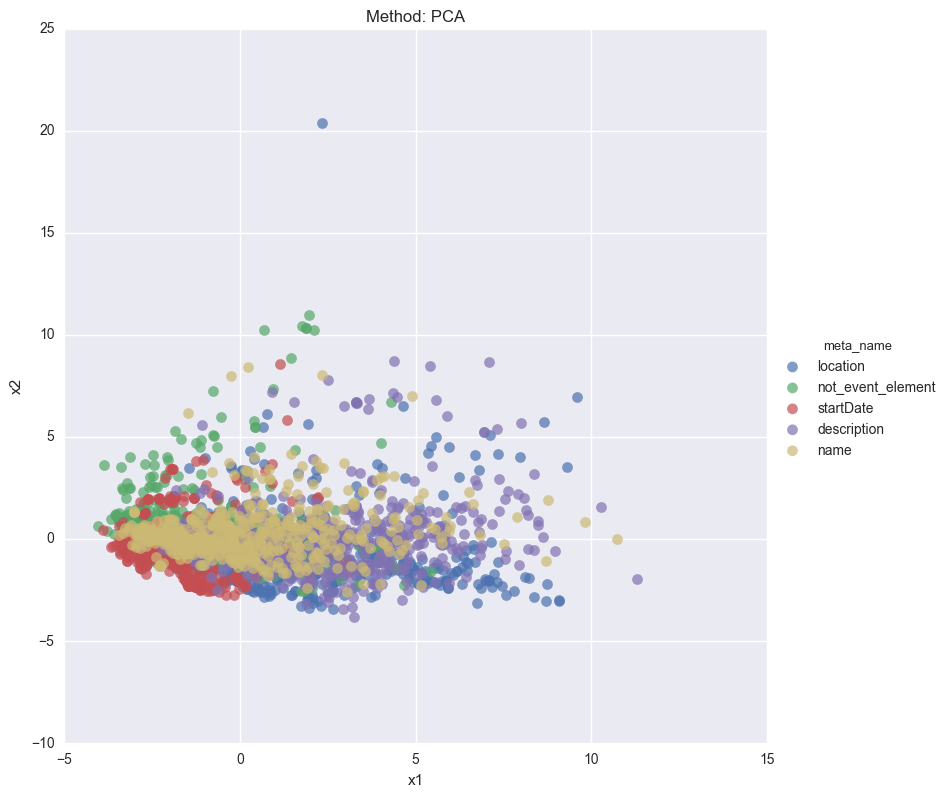

In [169]:
model = IncrementalPCA(n_components=2, batch_size=3)
title = 'Method: PCA'
result = get_result(X, y, model, title)
draw(result)

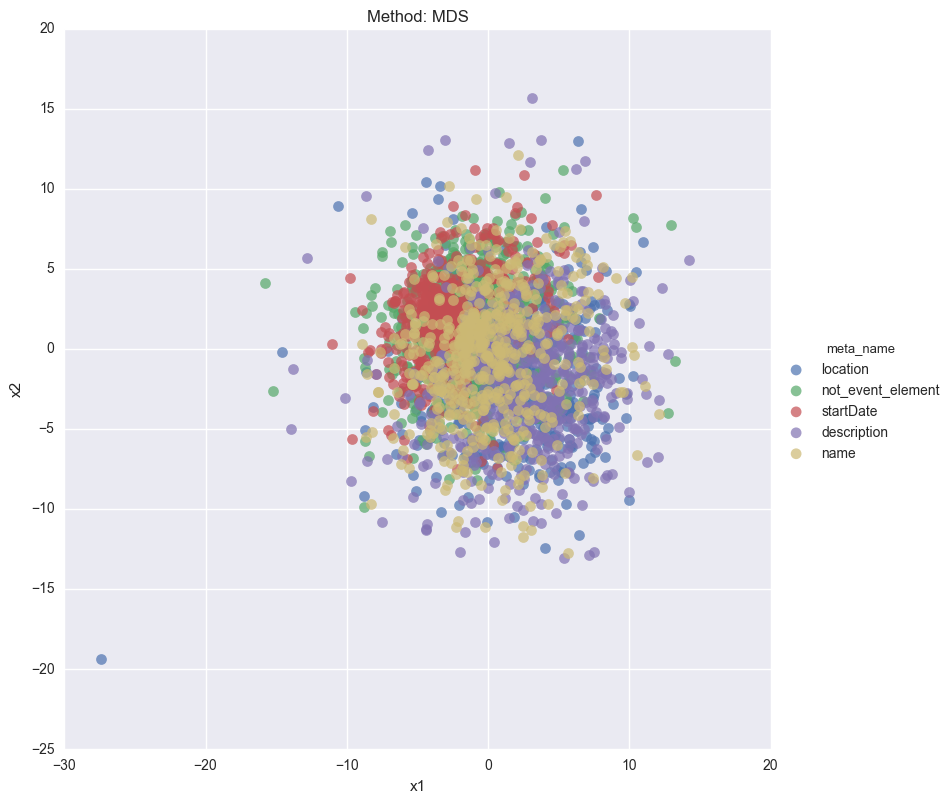

In [174]:
model = MDS(n_components=2, max_iter=100, n_init=1)
title = 'Method: MDS'
result = get_result(X, y, model, title)
draw(result)